## Very basic dump of all data for your Tesla(s)

Run this cell first, before the others to establish your connection.

In [1]:
import teslajson
import pprint

connection = teslajson.Connection('login','password')

cars = connection.vehicles

for car in cars:
    car.wake_up()
    car_data = car.all_data()
    
    ### Filtering personal data to share
    car_data['vin'] = '<filtered>'
    car_data['vehicle_state']['vin'] = '<filtered>'
    car_data['drive_state']['latitude'] = 0
    car_data['drive_state']['longitude'] = 0
    car_data['drive_state']['native_latitude'] = 0
    car_data['drive_state']['native_longitude'] = 0
    pprint.pprint(car_data)
    ###
    

{'backseat_token': None,
 'backseat_token_updated_at': None,
 'calendar_enabled': True,
 'charge_state': {'battery_heater_on': False,
                  'battery_level': 44,
                  'battery_range': 125.46,
                  'charge_current_request': 72,
                  'charge_current_request_max': 72,
                  'charge_enable_request': False,
                  'charge_energy_added': 0.0,
                  'charge_limit_soc': 75,
                  'charge_limit_soc_max': 100,
                  'charge_limit_soc_min': 50,
                  'charge_limit_soc_std': 90,
                  'charge_miles_added_ideal': 0.0,
                  'charge_miles_added_rated': 0.0,
                  'charge_port_door_open': True,
                  'charge_port_latch': 'Engaged',
                  'charge_rate': 0.0,
                  'charge_to_max_range': False,
                  'charger_actual_current': 0,
                  'charger_phases': None,
                  'charger_pilo

## Stop charging based on range instead of percent

In [2]:
import time

charging_car = cars[1]
range_level = 200

charging_car.command('charge_start')

while(True):
    charge_state = charging_car.data_request('charge_state')
    print(str(charge_state['battery_level'])+'%',charge_state['battery_range'])
    if charge_state['battery_range'] >= range_level:
        charging_car.command('charge_stop')
        print("Stopped Charging")
        break
    time.sleep(60)
    

65% 200.67
Stopped Charging


## Graph your drive

Start this before you go on a drive/trip and let it run for the duration.

There is also a streaming portion of the API that would be better to gather this info and store yourself to analyze. This is just a simple example for a quick battery percentage/range/power graph collected at 5 second intervals.

Capturing 5 minutes of data...


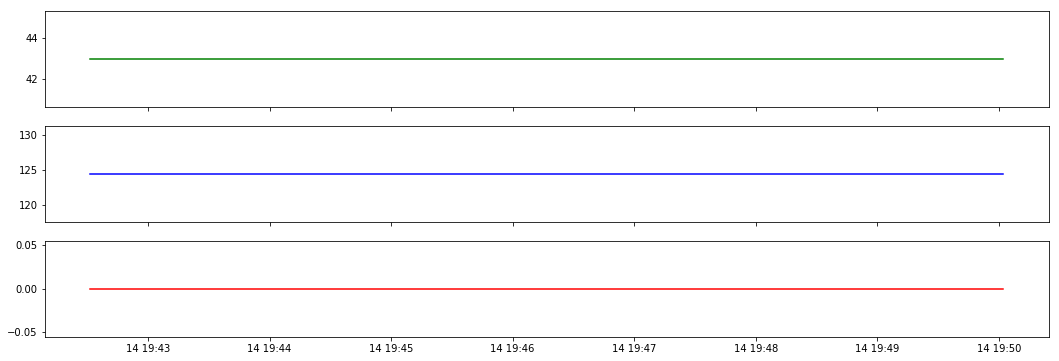

In [7]:
import time
import datetime
import matplotlib.pyplot as pyplot

recording_time = 5 # in minutes
car = cars[0] # pick your car
print("Capturing %d minutes of data..." % (recording_time))
x = []
battery_level = []
battery_range = []
power_level = []

for i in range(recording_time * 12):
    try:
        charge_state = car.data_request('charge_state')
        power = car.data_request('drive_state')['power']
        x.append(datetime.datetime.now())
        battery_level.append(charge_state['battery_level'])
        battery_range.append(charge_state['battery_range'])
        power_level.append(power)
        #print(power)
    except:
        pass
    time.sleep(5)

pyplot.rcParams["figure.figsize"] = [18.0,6.0]
fig, (level,b_range,power) = pyplot.subplots(3,1,sharex=True)
level.plot(x,battery_level,'g')
pyplot.setp(level.get_xticklabels(),visible=False)
b_range.plot(x,battery_range,'b')
pyplot.setp(b_range.get_xticklabels(),visible=False)
power.plot(x,power_level,'r')
pyplot.show()